In [ ]:
!pip install -i https://test.pypi.org/simple/ all-in-one-ml==0.0.3

Looking in indexes: https://test.pypi.org/simple/
  Created wheel for all-in-one-ml: filename=all_in_one_ml-0.0.3-cp36-none-any.whl size=3868 sha256=9b67fde7474266ac31d17ce65d3a8b8b514ab1caaab5f911f454ed30b37fe633
  Stored in directory: /root/.cache/pip/wheels/26/4f/f4/d595e3f4e73e8a49c62b9e2e99856618444f8d4c938d9c1b28
Successfully built all-in-one-ml


In [ ]:
from all_in_one_ml import beginner
from sklearn import datasets
import pandas as pd

In [ ]:
data = datasets.fetch_openml('thyroid-new')

In [ ]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['class'] = data.target

In [ ]:
df.head()

,2,3,4,5,6,class
0,107.0,10.1,2.2,0.9,2.7,1
1,113.0,9.9,3.1,2.0,5.9,1
2,127.0,12.9,2.4,1.4,0.6,1
3,109.0,5.3,1.6,1.4,1.5,1
4,105.0,7.3,1.5,1.5,-0.1,1


In [ ]:
x = df.drop(columns=['class'])
y = df['class']

In [ ]:
y_hot = beginner.one_hot(x,y,onlyoutcome=True)
print(x,y_hot)

         2     3    4    5     6
0    107.0  10.1  2.2  0.9   2.7
1    113.0   9.9  3.1  2.0   5.9
2    127.0  12.9  2.4  1.4   0.6
3    109.0   5.3  1.6  1.4   1.5
4    105.0   7.3  1.5  1.5  -0.1
..     ...   ...  ...  ...   ...
210  118.0   6.5  1.3  1.7  11.5
211  139.0   4.2  0.7  4.3   6.3
212  103.0   5.1  1.4  1.2   5.0
213   97.0   4.7  1.1  2.1  12.6
214  102.0   5.3  1.4  1.3   6.7

[215 rows x 5 columns]      1  2  3
0    1  0  0
1    1  0  0
2    1  0  0
3    1  0  0
4    1  0  0
..  .. .. ..
210  0  0  1
211  0  0  1
212  0  0  1
213  0  0  1
214  0  0  1

[215 rows x 3 columns]


In [ ]:
x_train,x_test,y_train,y_test = beginner.split_dataset(x,y_hot,0.2,8)

(172, 5) (172, 3) (43, 5) (43, 3)


In [ ]:
x_train.head()

,2,3,4,5,6
67,97.0,7.8,1.3,1.2,0.9
144,94.0,7.5,1.2,1.3,4.4
68,113.0,11.1,1.7,0.8,2.3
42,129.0,11.9,2.7,1.2,3.5
3,109.0,5.3,1.6,1.4,1.5


In [ ]:
y_train.head()

,1,2,3
67,1,0,0
144,1,0,0
68,1,0,0
42,1,0,0
3,1,0,0


In [ ]:
model,history = beginner.build_compile_fit_model(x_train,y_train,'classification',30,3,[100,100,100],['relu','relu','relu'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 303       
Total params: 21,103
Trainable params: 21,103
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
5/5 [==============================] - 0s 31ms/step - loss: 1.8446 - accuracy: 0.4818 - val_loss: 0.8726 - val_accuracy: 0.7429
Epoch 2/30
5/5 [==============================] - 0s 5ms/step - loss: 1.5685 - accuracy: 0.7080 - val_loss: 0

In [ ]:
beginner.get_accuracy(x_test,y_test,model)

2/2 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 0.9535


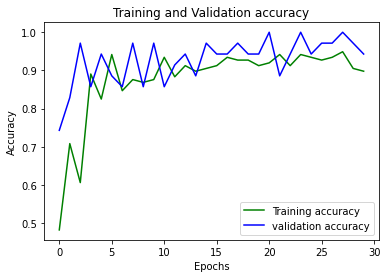

In [ ]:
beginner.accuracy_vs_valaccuracy(model,history,30)

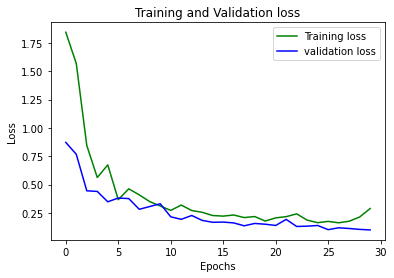

In [ ]:
beginner.loss_vs_valloss(model,history,30)